# **Final Project**

For my final project I am going to work on the IMDB Dataset of 50K Movie Reviews dataset I found in Kaggle.com 
https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews 

This is a dataset for binary sentiment classification containing a set of 50,000 movie reviews for training and testing. 
After loading the dataset I will clean the data by checking for NA records and removing duplicates (if any). I will then tokenize the review and remove the stopword and run the lemmatizer on the dataset. 

Now that the dataset is cleaned I will use the train_test_split() and find out the train and test sets of data. Then I will use  the 3 Naïve Bayes classifiers available in sklearn package and fit the data then predict on the test set and check the score. 


In [71]:
#pip install wordcloud

### **Import Packages**

Below I am importing all the necessary packages required for this project.

In [72]:
#core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# ml
import sklearn
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.preprocessing import LabelEncoder

from wordcloud import WordCloud
import re
from collections import defaultdict

# Tokenizers and stopwords
import nltk
from nltk.corpus import wordnet
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

### **Load the dataset**

Here I am loading the dataset from my local machine in .csv format using pandas read_csv()

The 2 sentiments here are positive and negative so I am changing positive to 1 and negative to 0.

The head of the dataset is also displayed to see how the data looks like.

In [73]:
imdb_df = pd.read_csv("C:/Users/irene/DATA620/IMDB_Dataset.csv")
imdb_df=pd.DataFrame(imdb_df)
# mapping the sentiment as 0 for neg and 1 for positive
imdb_df['sentiment'] = imdb_df['sentiment'].map({'positive':1,'negative':0})
imdb_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


The shape of the dataset is displayed below. There are 50000 reviews and there are 2 columns

In [74]:
imdb_df.shape

(50000, 2)

### **Cleaning the data**

Checking if there are any NA fields.

Can see that there are no such fields.

In [75]:
imdb_df.isna().sum()

review       0
sentiment    0
dtype: int64

Below is a summary of the dataset

In [76]:
imdb_df.describe()

,sentiment
count,50000.000000
mean,0.500000
std,0.500005
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


Checking if there are any duplicate records.

There are 418 duplicates and those are dropped as well by keeping the first of the duplicates.

In [77]:
imdb_df.review.duplicated().sum()

418

In [78]:
#imdb_df = imdb_df.apply(lambda x: str(x).lower()) #lower

imdb_df.drop_duplicates(keep = "first", inplace = True)

Converting the reviews into lower case

In [79]:
imdb_df["review"] = imdb_df["review"].str.lower() #lower

In [80]:
imdb_df

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0
49997,i am a catholic taught in parochial elementary...,0
49998,i'm going to have to disagree with the previou...,0


The below function removes the punctuations from the review field

In [81]:
def clean_data(df):

    #x=[]
    punc = re.compile('<.*?>')
    clean_df = re.sub(punc, '', df)
    #x=x.append(clean_df)
    return clean_df

imdb_df['review'] = imdb_df.review.apply(lambda x: clean_data(x))

Calculating the length of the review field

In [82]:
imdb_df["length"]=[len(r.split()) for r in imdb_df["review"]]
imdb_df

,review,sentiment,length
0,one of the other reviewers has mentioned that ...,1,301
1,a wonderful little production. the filming tec...,1,156
2,i thought this was a wonderful way to spend ti...,1,162
3,basically there's a family where a little boy ...,0,132
4,"petter mattei's ""love in the time of money"" is...",1,222
...,...,...,...
49995,i thought this movie did a down right good job...,1,190
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0,108
49997,i am a catholic taught in parochial elementary...,0,226
49998,i'm going to have to disagree with the previou...,0,212


### **Visual Representation**

Below I am representing the positive and negative reviews as an histogram.

It can be seen that the negative reviews have more right skewwing than positive reviews.

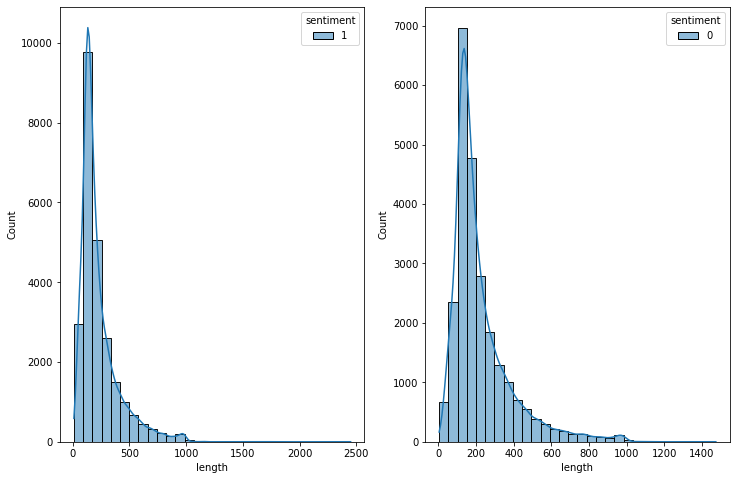

In [83]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.histplot(data=imdb_df[imdb_df["sentiment"] == 1], x = "length", kde=True, hue="sentiment", bins=30)

plt.subplot(1,2,2)
sns.histplot(data=imdb_df[imdb_df["sentiment"] == 0], x = "length", kde=True, hue="sentiment", bins=30)

plt.show()

**WORDCLOUD of the Positive reviews.**

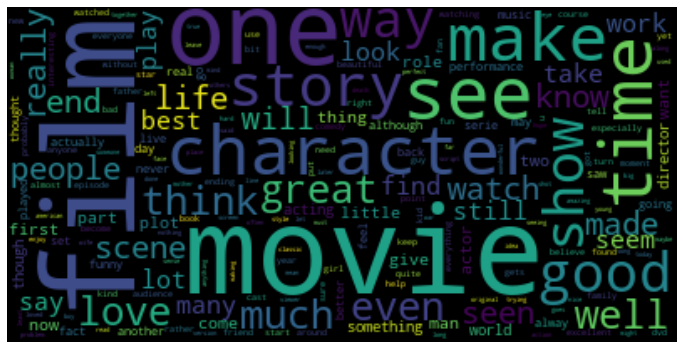

In [84]:
plt.figure(figsize=(12,12))
W=WordCloud().generate(" ".join(imdb_df[imdb_df.sentiment == 1].review))
plt.axis('off')
plt.imshow(W, interpolation='bilinear')

**WORDCLOUD of the Negative reviews.**

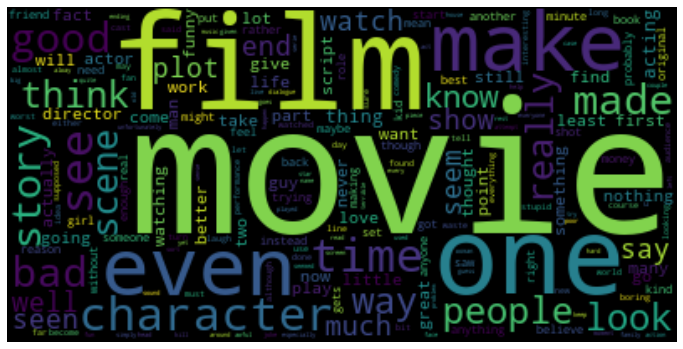

In [85]:
plt.figure(figsize=(12,12))
W=WordCloud().generate(" ".join(imdb_df[imdb_df.sentiment == 0].review))
plt.axis('off')
plt.imshow(W, interpolation='bilinear')

#### **VADER Sentiment Analysis :**

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon which is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

*Assigning a new column with the polarity scores.*

Polarity_scores method of SentimentIntensityAnalyzer object gives a sentiment dictionary which contains pos, neg, neu, and compound scores.

In [86]:
#download vader_lexicon
nltk.download('vader_lexicon')

#Create a SentimentIntensityAnalyzer object
senti=SentimentIntensityAnalyzer()

## Using SentimentIntensityAnalyzer lets get the polarity scores for each review
imdb_df['polarity_scores'] = imdb_df['review'].apply(lambda r: senti.polarity_scores(r))

imdb_df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\irene\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review,sentiment,length,polarity_scores
0,one of the other reviewers has mentioned that ...,1,301,"{'neg': 0.199, 'neu': 0.744, 'pos': 0.057, 'co..."
1,a wonderful little production. the filming tec...,1,156,"{'neg': 0.055, 'neu': 0.768, 'pos': 0.177, 'co..."
2,i thought this was a wonderful way to spend ti...,1,162,"{'neg': 0.096, 'neu': 0.708, 'pos': 0.196, 'co..."
3,basically there's a family where a little boy ...,0,132,"{'neg': 0.144, 'neu': 0.788, 'pos': 0.068, 'co..."
4,"petter mattei's ""love in the time of money"" is...",1,222,"{'neg': 0.053, 'neu': 0.795, 'pos': 0.152, 'co..."
...,...,...,...,...
49995,i thought this movie did a down right good job...,1,190,"{'neg': 0.048, 'neu': 0.749, 'pos': 0.203, 'co..."
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0,108,"{'neg': 0.171, 'neu': 0.711, 'pos': 0.118, 'co..."
49997,i am a catholic taught in parochial elementary...,0,226,"{'neg': 0.211, 'neu': 0.679, 'pos': 0.11, 'com..."
49998,i'm going to have to disagree with the previou...,0,212,"{'neg': 0.105, 'neu': 0.813, 'pos': 0.082, 'co..."


In [87]:
# the compound value is stored in a seperate column
imdb_df['compound'] = imdb_df['polarity_scores'].apply(lambda c: c['compound'])

# compound scores are assigned as 0 or 1 based on the compound value
imdb_df['compound_scores'] = imdb_df['compound'].apply(lambda c: 1 if c >= 0 else 0)

imdb_df

,review,sentiment,length,polarity_scores,compound,compound_scores
0,one of the other reviewers has mentioned that ...,1,301,"{'neg': 0.199, 'neu': 0.744, 'pos': 0.057, 'co...",-0.9947,0
1,a wonderful little production. the filming tec...,1,156,"{'neg': 0.055, 'neu': 0.768, 'pos': 0.177, 'co...",0.9641,1
2,i thought this was a wonderful way to spend ti...,1,162,"{'neg': 0.096, 'neu': 0.708, 'pos': 0.196, 'co...",0.9605,1
3,basically there's a family where a little boy ...,0,132,"{'neg': 0.144, 'neu': 0.788, 'pos': 0.068, 'co...",-0.9213,0
4,"petter mattei's ""love in the time of money"" is...",1,222,"{'neg': 0.053, 'neu': 0.795, 'pos': 0.152, 'co...",0.9744,1
...,...,...,...,...,...,...
49995,i thought this movie did a down right good job...,1,190,"{'neg': 0.048, 'neu': 0.749, 'pos': 0.203, 'co...",0.9890,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0,108,"{'neg': 0.171, 'neu': 0.711, 'pos': 0.118, 'co...",-0.6693,0
49997,i am a catholic taught in parochial elementary...,0,226,"{'neg': 0.211, 'neu': 0.679, 'pos': 0.11, 'com...",-0.9851,0
49998,i'm going to have to disagree with the previou...,0,212,"{'neg': 0.105, 'neu': 0.813, 'pos': 0.082, 'co...",-0.7648,0


Displaying the accuracy using VADER lexicon

In [88]:
print("Accuracy with VADER Sentiment Analysis is: ", accuracy_score(imdb_df['sentiment'],imdb_df["compound_scores"]))

Accuracy with VADER Sentiment Analysis is:  0.6968456294623049


### **Lemmatize**

The below function performs lemmatization on the data before splitting it into train and test data for further Naive Bayes analysis.

In [89]:
L = WordNetLemmatizer()

def lemmafn(data):
    data = data.split()
    data = [L.lemmatize(w) for w in data]
    return ' '.join(data)

imdb_df['lemma_review'] = imdb_df['review'].apply(lemmafn)

In [90]:
imdb_df

,review,sentiment,length,polarity_scores,compound,compound_scores,lemma_review
0,one of the other reviewers has mentioned that ...,1,301,"{'neg': 0.199, 'neu': 0.744, 'pos': 0.057, 'co...",-0.9947,0,one of the other reviewer ha mentioned that af...
1,a wonderful little production. the filming tec...,1,156,"{'neg': 0.055, 'neu': 0.768, 'pos': 0.177, 'co...",0.9641,1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...,1,162,"{'neg': 0.096, 'neu': 0.708, 'pos': 0.196, 'co...",0.9605,1,i thought this wa a wonderful way to spend tim...
3,basically there's a family where a little boy ...,0,132,"{'neg': 0.144, 'neu': 0.788, 'pos': 0.068, 'co...",-0.9213,0,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is...",1,222,"{'neg': 0.053, 'neu': 0.795, 'pos': 0.152, 'co...",0.9744,1,"petter mattei's ""love in the time of money"" is..."
...,...,...,...,...,...,...,...
49995,i thought this movie did a down right good job...,1,190,"{'neg': 0.048, 'neu': 0.749, 'pos': 0.203, 'co...",0.9890,1,i thought this movie did a down right good job...
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0,108,"{'neg': 0.171, 'neu': 0.711, 'pos': 0.118, 'co...",-0.6693,0,"bad plot, bad dialogue, bad acting, idiotic di..."
49997,i am a catholic taught in parochial elementary...,0,226,"{'neg': 0.211, 'neu': 0.679, 'pos': 0.11, 'com...",-0.9851,0,i am a catholic taught in parochial elementary...
49998,i'm going to have to disagree with the previou...,0,212,"{'neg': 0.105, 'neu': 0.813, 'pos': 0.082, 'co...",-0.7648,0,i'm going to have to disagree with the previou...


### **Split the dataset**

The below function splits the dataset into test and train sets using the train_test_split() function. It returns 4 items namely: X_train, X_test, y_train, y_test

In [91]:
def split_train_test(size):
    X_train, X_test, y_train, y_test = tts(imdb_df.lemma_review, imdb_df.sentiment, test_size = size, random_state =1)
    
    print("The size of X_train, X_test, y_train, y_test are as follows for {}".format(size))
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    return X_train, X_test, y_train, y_test

I am taking 2 cases:

1. test set size is 0.3 of the dataset
2. test set size is 0.5 of the dataset

In [92]:
X_train_3, X_test_3, y_train_3, y_test_3=split_train_test(0.3)

X_train_5, X_test_5, y_train_5, y_test_5=split_train_test(0.5)

The size of X_train, X_test, y_train, y_test are as follows for 0.3
(34707,) (14875,) (34707,) (14875,)
The size of X_train, X_test, y_train, y_test are as follows for 0.5
(24791,) (24791,) (24791,) (24791,)


**LabelEncoder**

**Label Encoding** refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. 

*fit_transform(x):* Fit label encoder and return encoded labels.

*transform(x):* Transform labels to normalized encoding.

**TfidfVectorizer**

**TF-IDF** stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

TfidfVectorizer - Transforms text to feature vectors.

In [93]:
le = LabelEncoder()
y_train_3 = le.fit_transform(y_train_3)
y_test_3 = le.transform(y_test_3)

tfidf = TfidfVectorizer(max_features =5000)
tfidf.fit(imdb_df['lemma_review'])

X_train_3_tfidf = tfidf.transform(X_train_3)
X_test_3_tfidf = tfidf.transform(X_test_3)

X_train_3_dense = X_train_3_tfidf.todense()
X_test_3_dense = X_test_3_tfidf.todense()


In [94]:
#dataframe of accuracy values
infer = pd.DataFrame(index=['GaussianNB','MultinomialNB','BernoulliNB'])

### **Using the train data in Naive Bayes classifiers**

Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes theorem. It is a simple classification technique, but has high functionality. They find use when the dimensionality of the inputs is high. Complex classification problems can also be implemented by using Naive Bayes Classifier.

## Test set size of 0.3

**Gaussian Naive Bayes Classifier**

Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data.

In [95]:
G3 = GaussianNB()
G3.fit(X_train_3_dense, y_train_3)
G3_pred_3=G3.predict(X_test_3_dense)
Gx3=accuracy_score(y_test_3,G3_pred_3)
print("Gaussian Naive Bayes accuracy for test set size 0.3 is : ",Gx3)
print(classification_report(y_test_3,G3_pred_3))
#infer[0]=[x]

Gaussian Naive Bayes accuracy for test set size 0.3 is :  0.7967731092436975
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      7461
           1       0.80      0.79      0.79      7414

    accuracy                           0.80     14875
   macro avg       0.80      0.80      0.80     14875
weighted avg       0.80      0.80      0.80     14875



**Multinomial Naive Bayes Classifier**

Multinomial Naive Bayes is a specialized version of naive bayes designed to handle text documents using word counts as it's underlying method of calculating probability.

In [96]:
M3=MultinomialNB()
M3.fit(X_train_3_dense,y_train_3)
M3_pred_3=M3.predict(X_test_3_dense)
Mx3=accuracy_score(y_test_3,M3_pred_3)
print("Multinomial Naive Bayes accuracy for test set size 0.3 is : ",Mx3)
print(classification_report(y_test_3,M3_pred_3))
#infer[1]=[x]

Multinomial Naive Bayes accuracy for test set size 0.3 is :  0.8538487394957983
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7461
           1       0.85      0.86      0.85      7414

    accuracy                           0.85     14875
   macro avg       0.85      0.85      0.85     14875
weighted avg       0.85      0.85      0.85     14875



**Bernoulli Naive Bayes Classifier**

Bernoulli Naive Bayes is used for discrete data and it works on Bernoulli distribution. The main feature of Bernoulli Naive Bayes is that it accepts features only as binary values like true or false, yes or no, success or failure, 0 or 1 and so on.

In [97]:
B3=BernoulliNB()
B3.fit(X_train_3_dense,y_train_3)
B3_pred_3=B3.predict(X_test_3_dense)
Bx3=accuracy_score(y_test_3,B3_pred_3)
print("Bernoulli Naive Bayes accuracy for test set size 0.3 is : ",Bx3)
print(classification_report(y_test_3,B3_pred_3))

Bernoulli Naive Bayes accuracy for test set size 0.3 is :  0.8463865546218488
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      7461
           1       0.83      0.86      0.85      7414

    accuracy                           0.85     14875
   macro avg       0.85      0.85      0.85     14875
weighted avg       0.85      0.85      0.85     14875



## Test set size of 0.5

In [98]:
le = LabelEncoder()
y_train_5 = le.fit_transform(y_train_5)
y_test_5 = le.transform(y_test_5)

tfidf = TfidfVectorizer(max_features =5000)
tfidf.fit(imdb_df['lemma_review'])

X_train_5_tfidf = tfidf.transform(X_train_5)
X_test_5_tfidf = tfidf.transform(X_test_5)

X_train_5_dense = X_train_5_tfidf.todense()
X_test_5_dense = X_test_5_tfidf.todense()

**Gaussian Naive Bayes Classifier**

Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data.

In [99]:
G5 = GaussianNB()
G5.fit(X_train_5_dense, y_train_5)
G5_pred_5=G5.predict(X_test_5_dense)
Gy5=accuracy_score(y_test_5,G5_pred_5)
print("Gaussian Naive Bayes accuracy for test set size 0.5 is : ",Gy5)
print(classification_report(y_test_5,G5_pred_5))

Gaussian Naive Bayes accuracy for test set size 0.5 is :  0.7938768101327095
              precision    recall  f1-score   support

           0       0.79      0.81      0.80     12463
           1       0.80      0.78      0.79     12328

    accuracy                           0.79     24791
   macro avg       0.79      0.79      0.79     24791
weighted avg       0.79      0.79      0.79     24791



**Multinomial Naive Bayes Classifier**

Multinomial Naive Bayes is a specialized version of naive bayes designed to handle text documents using word counts as it's underlying method of calculating probability.

In [100]:
M5=MultinomialNB()
M5.fit(X_train_5_dense,y_train_5)
M5_pred_5=M5.predict(X_test_5_dense)
My5=accuracy_score(y_test_5,M5_pred_5)
print("Multinomial Naive Bayes accuracy for test set size 0.5 is : ",My5)
print(classification_report(y_test_5,M5_pred_5))

Multinomial Naive Bayes accuracy for test set size 0.5 is :  0.8539389294502037
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     12463
           1       0.84      0.87      0.85     12328

    accuracy                           0.85     24791
   macro avg       0.85      0.85      0.85     24791
weighted avg       0.85      0.85      0.85     24791



**Bernoulli Naive Bayes Classifier**

Bernoulli Naive Bayes is used for discrete data and it works on Bernoulli distribution. The main feature of Bernoulli Naive Bayes is that it accepts features only as binary values like true or false, yes or no, success or failure, 0 or 1 and so on.

In [101]:
B5=BernoulliNB()
B5.fit(X_train_5_dense,y_train_5)
B5_pred_5=B5.predict(X_test_5_dense)
By5=accuracy_score(y_test_5,B5_pred_5)
print("Bernoulli Naive Bayes accuracy for test set size 0.5 is : ",By5)
print(classification_report(y_test_5,B5_pred_5))

Bernoulli Naive Bayes accuracy for test set size 0.5 is :  0.8462345205921504
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     12463
           1       0.83      0.87      0.85     12328

    accuracy                           0.85     24791
   macro avg       0.85      0.85      0.85     24791
weighted avg       0.85      0.85      0.85     24791



**Displaying the accuracy of all the Naive Bayes Classifiers**

In [102]:
infer[0]=[Gx3,Mx3,Bx3]
infer[1]=[Gy5,My5,By5]
infer.columns=['0.3','0.5']
infer

,0.3,0.5
GaussianNB,0.796773,0.793877
MultinomialNB,0.853849,0.853939
BernoulliNB,0.846387,0.846235


### **Conclusion**

There are 50000 records in this dataset and 0 NA records. There were 418 duplicates that were dropped.

The histogram with kde (Kernel density estimation) of the Positive and negative reviews show that the negative reviews are more skewwed to the right comapred to the positive reviews.

From the WordCloud it can be seen that in positive reviews the most common words are movie and film whereas in negative reviews the most common word is movie followed by film.

VADER sentiment Analysis had an accuracy rate of almost 70% which was not that great.

For the test set size of 0.3 the best accuracy was achieved using MultinomialNB().
For test set of size 0.5 also MultinomialNB() had the best accuracy.

### **Video**